In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats


# Load the tips dataset
tips = sns.load_dataset("tips")

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


*Visualize the relationship between the tip amount and the total_bill amount using a scatterplot.*


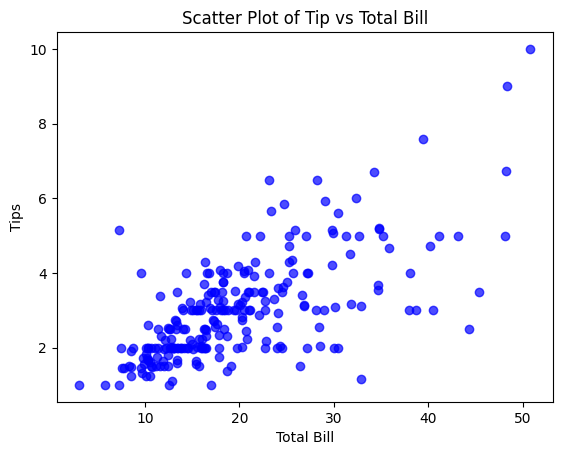

In [ ]:
# Build Scatter Plot Tips vs Total Bill

plt.scatter(tips['total_bill'], tips['tip'], color='blue', alpha=0.7)
plt.title("Scatter Plot of Tip vs Total Bill")
plt.xlabel("Total Bill")
plt.ylabel("Tips")
plt.show()

*Let's calculate the Pearson and Spearman correlation coefficients between the size of the tip and the size of the check. Let's find out if the relationship between them is statistically significant?*

In [ ]:
from scipy.stats import pearsonr

# Calculate p-value by Pearson
print(f"Test statistic and p-value: {pearsonr(tips['tip'], tips['total_bill'])}")

# Calculate Pearson correlation
pearson_corr = tips["tip"].corr(tips["total_bill"])
print(f"Pearson Correlation: {pearson_corr}")

Test statistic and p-value: PearsonRResult(statistic=np.float64(0.6757341092113647), pvalue=np.float64(6.692470646863279e-34))
Pearson Correlation: 0.6757341092113641


Pearson test result: p-value < 0.05 - the relationship between tip size and check size is statistically significant. The correlation coefficient is moderately positive. That is, tip size and check size have a direct but moderate relationship.

In [ ]:
from scipy.stats import spearmanr

# Calculate p-value by Spearman
print(f"Test statistic and p-value: {spearmanr(tips['tip'], tips['total_bill'])}")

# Calculate Spearman correlation
spearman_corr = tips["tip"].corr(tips["total_bill"], method="spearman")
print(f"Spearman Correlation: {spearman_corr}")

Test statistic and p-value: SignificanceResult(statistic=np.float64(0.6789681219001009), pvalue=np.float64(2.501158440923619e-34))
Spearman Correlation: 0.6789681219001009


Spearman test result: p-value < 0.05, coefficient < 0.7 - Tip size and check size have a statistically significant moderate direct relationship.


*Let's determine whether the distribution of the variables tip and total_bill resembles a normal distribution. Let's determine which of the two correlation coefficients best fits this input data.*

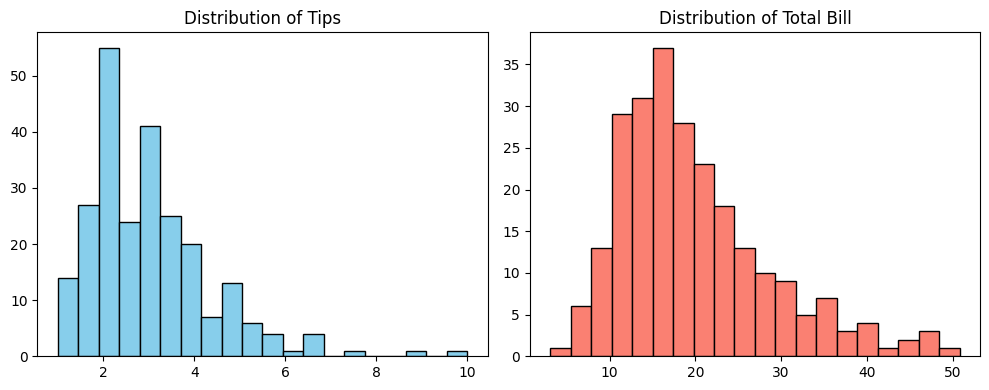

In [ ]:
# Plotting histograms to visualize data distributions
plt.figure(figsize=(10, 4))

# Distribution of Tips
plt.subplot(1, 2, 1)
plt.hist(tips['tip'], bins=20, color="skyblue", edgecolor="black")
plt.title("Distribution of Tips")

# Distribution of Total Bills
plt.subplot(1, 2, 2)
plt.hist(tips['total_bill'], bins=20, color="salmon", edgecolor="black")
plt.title("Distribution of Total Bill")

plt.tight_layout()
plt.show()

The distribution of tips is asymmetric and right-skewed. The distribution of check amounts is also right-skewed, but more symmetric.

Since the distribution is not symmetrical and normal, there are outliers in tips, it is more appropriate to calculate the coefficient based on the **Spearman method**

*Let's calculate the degree of closeness of the statistical relationship between the size of the group size and the size of the check total_bill. Let's determine which of the correlation coefficients is appropriate to apply here and whether the relationship is statistically significant.*

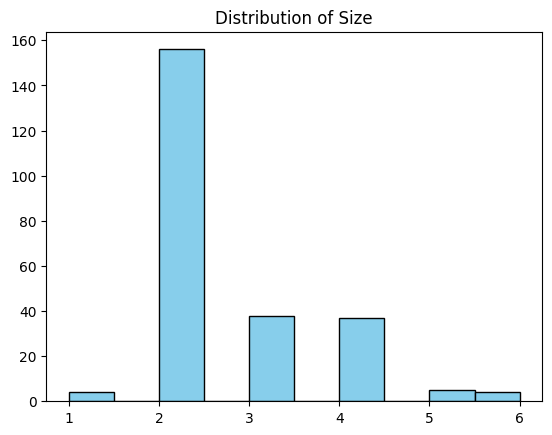

In [ ]:
# Build Distribution of Size

plt.hist(tips['size'], color="skyblue", edgecolor="black")
plt.title("Distribution of Size")
plt.show()

The size values ​​are quantitative (discrete) from a non-normal distribution. To calculate the degree of correlation between size and check size, it is better to use **Spearman's coefficient**.

In [ ]:
# Calculate p-value by Spearman
print(f"Test statistic and p-value: {spearmanr(tips['size'], tips['total_bill'])}")

# Calculate Spearman correlation
spearman_corr = tips["size"].corr(tips["total_bill"], method="spearman")
print(f"Spearman Correlation: {spearman_corr}")

Test statistic and p-value: SignificanceResult(statistic=np.float64(0.6047911390994543), pvalue=np.float64(9.92230778131113e-26))
Spearman Correlation: 0.6047911390994543


Spearman test result: p-value < 0.05, coefficient < 0.7 - Group size and check size have a statistically significant moderate direct relationship.